# Constrain fit parameters to a range of reasonable values

In [1]:
import neutcurve

import pandas as pd

/home/jbloom/neutcurve/neutcurve/hillcurve.py:1103: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
/home/jbloom/neutcurve/neutcurve/hillcurve.py:1103: RuntimeWarning: divide by zero encountered in divide
  return b + (t - b) / (1 + (c / m) ** s)


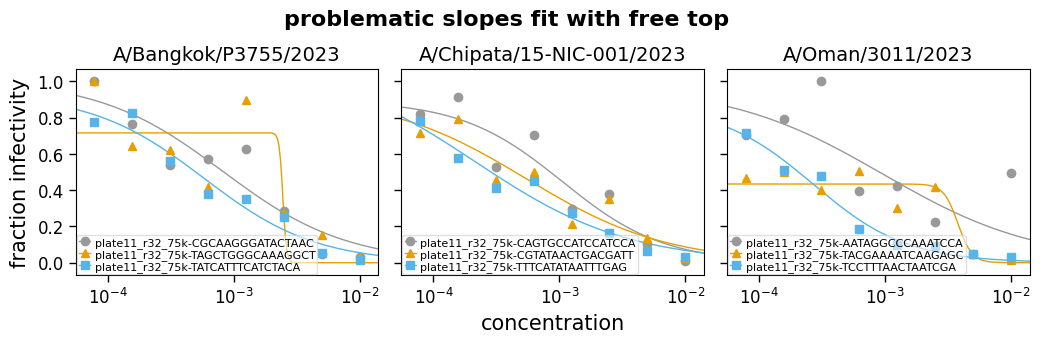

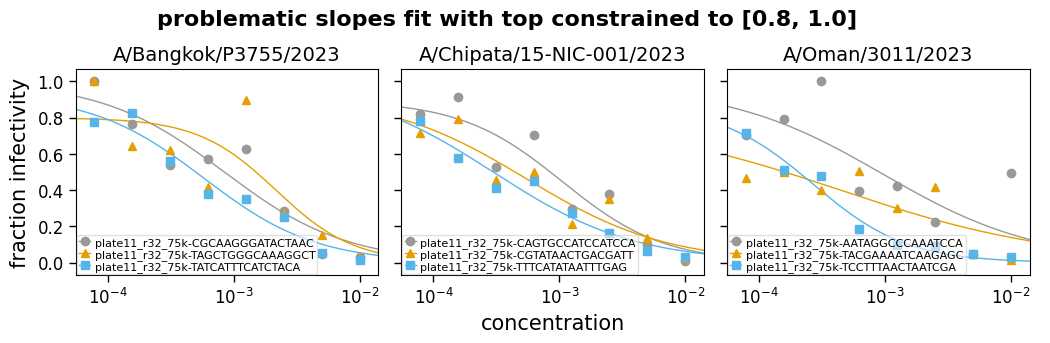

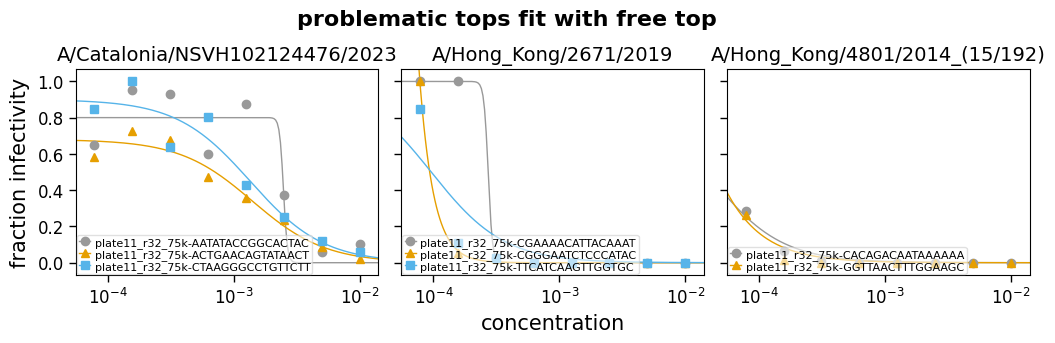

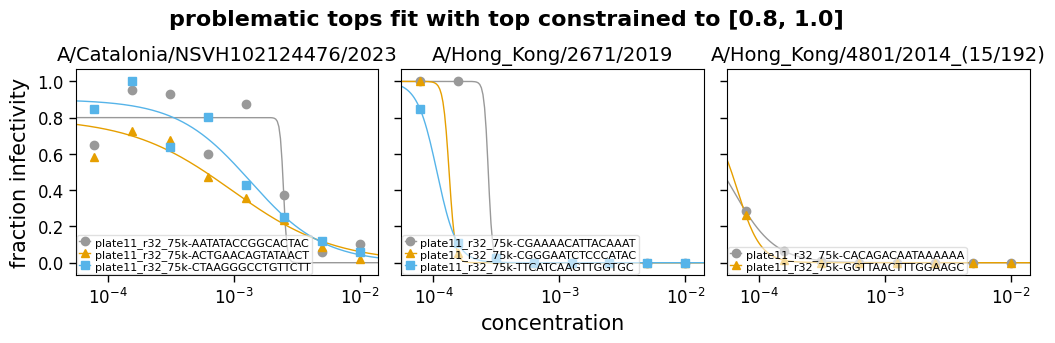

In [2]:
data = pd.read_csv("constrain_params_range_data.csv")

fit_params = []

for group, group_data in data.groupby("serum"):
    for desc, fixtop in [
        ("free top", False),
        ("top constrained to [0.8, 1.0]", (0.8, 1.0)),
    ]:
        fits = neutcurve.CurveFits(group_data, fixtop=fixtop)

        fig, _ = fits.plotReplicates(
            sera=[group],
            attempt_shared_legend=False,
            legendfontsize=8,
            heightscale=1.2,
            widthscale=1.1,
            subplot_titles="{virus}",
        )
        _ = fig.suptitle(
            f"{group} fit with {desc}",
            y=0.95,
            fontsize=16,
            fontweight="bold",
        )
        fig.tight_layout()

        fit_params.append(
            fits.fitParams(average_only=False, no_average=True)
            .assign(fit_method=desc)
            .drop(columns=["nreplicates", "ic50_str", "midpoint_bound"])
        )

fit_params = pd.concat(fit_params, ignore_index=True)
fit_params = fit_params[["fit_method"] + [c for c in fit_params.columns if c != "fit_method"]]

In [3]:
for serum_group, df in fit_params.groupby("serum"):
    print(f"\nFit params for {serum_group}")
    display(
        df.drop(columns="serum")
        .sort_values(["virus", "replicate", "fit_method"])
        .reset_index(drop=True)
        .round(4)
    )


Fit params for problematic slopes


,fit_method,virus,replicate,ic50,ic50_bound,midpoint,midpoint_bound_type,slope,top,bottom,r2
0,free top,A/Bangkok/P3755/2023,plate11_r32_75k-CGCAAGGGATACTAAC,0.0008,interpolated,0.0008,interpolated,0.8802,1.0101,0.0,0.8650
1,"top constrained to [0.8, 1.0]",A/Bangkok/P3755/2023,plate11_r32_75k-CGCAAGGGATACTAAC,0.0008,interpolated,0.0008,interpolated,0.8929,1.0000,0.0,0.8650
2,free top,A/Bangkok/P3755/2023,plate11_r32_75k-TAGCTGGGCAAAGGCT,0.0024,interpolated,0.0025,interpolated,30.7950,0.7161,0.0,0.7145
3,"top constrained to [0.8, 1.0]",A/Bangkok/P3755/2023,plate11_r32_75k-TAGCTGGGCAAAGGCT,0.0015,interpolated,0.0022,interpolated,1.3964,0.8000,0.0,0.6670
4,free top,A/Bangkok/P3755/2023,plate11_r32_75k-TATCATTTCATCTACA,0.0005,interpolated,0.0006,interpolated,0.9728,0.9328,0.0,0.9537
5,"top constrained to [0.8, 1.0]",A/Bangkok/P3755/2023,plate11_r32_75k-TATCATTTCATCTACA,0.0005,interpolated,0.0006,interpolated,0.9729,0.9328,0.0,0.9537
6,free top,A/Chipata/15-NIC-001/2023,plate11_r32_75k-CAGTGCCATCCATCCA,0.0008,interpolated,0.0011,interpolated,1.0738,0.8952,0.0,0.8697
7,"top constrained to [0.8, 1.0]",A/Chipata/15-NIC-001/2023,plate11_r32_75k-CAGTGCCATCCATCCA,0.0008,interpolated,0.0011,interpolated,1.0738,0.8952,0.0,0.8697
8,free top,A/Chipata/15-NIC-001/2023,plate11_r32_75k-CGTATAACTGACGATT,0.0004,interpolated,0.0005,interpolated,0.7787,0.9261,0.0,0.8742
9,"top constrained to [0.8, 1.0]",A/Chipata/15-NIC-001/2023,plate11_r32_75k-CGTATAACTGACGATT,0.0004,interpolated,0.0005,interpolated,0.7787,0.9261,0.0,0.8742



Fit params for problematic tops


,fit_method,virus,replicate,ic50,ic50_bound,midpoint,midpoint_bound_type,slope,top,bottom,r2
0,free top,A/Catalonia/NSVH102124476/2023,plate11_r32_75k-AATATACCGGCACTAC,0.0024,interpolated,0.0025,interpolated,28.3578,0.8005,0.0,0.8621
1,"top constrained to [0.8, 1.0]",A/Catalonia/NSVH102124476/2023,plate11_r32_75k-AATATACCGGCACTAC,0.0025,interpolated,0.0025,interpolated,31.9308,0.8005,0.0,0.8621
2,free top,A/Catalonia/NSVH102124476/2023,plate11_r32_75k-ACTGAACAGTATAACT,0.0007,interpolated,0.0014,interpolated,1.4963,0.6800,0.0,0.9569
3,"top constrained to [0.8, 1.0]",A/Catalonia/NSVH102124476/2023,plate11_r32_75k-ACTGAACAGTATAACT,0.0006,interpolated,0.0010,interpolated,1.0639,0.8000,0.0,0.9273
4,free top,A/Catalonia/NSVH102124476/2023,plate11_r32_75k-CTAAGGGCCTGTTCTT,0.0012,interpolated,0.0014,interpolated,1.4852,0.9005,0.0,0.9244
5,"top constrained to [0.8, 1.0]",A/Catalonia/NSVH102124476/2023,plate11_r32_75k-CTAAGGGCCTGTTCTT,0.0012,interpolated,0.0014,interpolated,1.4852,0.9005,0.0,0.9244
6,free top,A/Hong_Kong/2671/2019,plate11_r32_75k-CGAAAACATTACAAAT,0.0003,interpolated,0.0003,interpolated,25.7493,1.0000,0.0,1.0000
7,"top constrained to [0.8, 1.0]",A/Hong_Kong/2671/2019,plate11_r32_75k-CGAAAACATTACAAAT,0.0003,interpolated,0.0003,interpolated,26.1643,1.0000,0.0,1.0000
8,free top,A/Hong_Kong/2671/2019,plate11_r32_75k-CGGGAATCTCCCATAC,0.0001,interpolated,0.0000,upper,3.9336,44.3742,0.0,0.9995
9,"top constrained to [0.8, 1.0]",A/Hong_Kong/2671/2019,plate11_r32_75k-CGGGAATCTCCCATAC,0.0001,interpolated,0.0001,interpolated,18.2526,1.0000,0.0,0.9996
